# 실습 설명
워싱턴 D.C. 지역의 자전거 대여량을 예측하는 머신러닝 프로젝트를 시작해 봅시다. 데이터에는 자전거 대여 시간, 날씨 정보, 계절, 휴일 여부 등 다양한 정보가 담겨 있어요. 우리의 목표는 이 데이터를 분석하여 어떤 요인들이 자전거 대여량에 영향을 미치는지 알아보고, 이를 기반으로 미래의 대여 수요를 예측하는 모델을 만드는 것입니다. 앞으로 데이터를 정제하고, 머신 러닝 모델을 훈련시키며, 예측 결과를 평가해 보는 과정을 함께 진행해 볼 거예요. 
## 데이터 설명 
이번 프로젝트에서는 Kaggle의 자전거 수요 예측 경진대회에서 제공한 데이터를 사용합니다. 이번에 다루게 될 데이터 파일은 총 3개인데요. 훈련 데이터 train.csv, 테스트 데이터 test.csv, 그리고 Kaggle에 제출할 답안지 역할을 하는 sampleSubmission.csv 입니다. 각 컬럼의 의미는 아래에 설명해 둘 테니 참고해 주세요.
- datetime: 자전거 대여 일시 (연도-월-일-시간 형태)
- season: 계절을 나타내는 변수
- holiday: 공휴일 여부
- workingday : 근무일 여부
- temp: 섭씨 온도
- atemp: 체감 섭씨 온도
- humidity: 습도
- windspeed: 풍속
- registered: 정기권 회원 이용자의 대여량
- casual: 비회원 이용자의 대여량
- count: 총 대여량(회원과 비회원의 대여량 합)

## 평가 함수 설명
우리가 제출하는 답안을 평가하는 데 사용하는 공식을 '평가 함수'라고 하는데요. 우리가 참여할 Kaggle 경진대회에서는 RMSLE라는 평가 함수를 사용합니다. RMSLE(Root Mean Squared Logarithmic Error)는 회귀 모델의 예측 성능을 평가하는 데 사용되는 손실 함수 중 하나인데요. 실제 값과 예측 값 사이의 로그 차이의 제곱을 평균한 값의 제곱근으로 계산됩니다. 수식으로 나타내면 다음과 같아요. 참고로 여기서 ai 는 실제 답, pi 는 우리가 예측한 값을 나타냅니다.

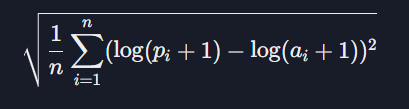

## 가이드라인
1. 데이터 불러오기
train.csv, test.csv, sampleSubmission.csv 파일을 DataFrame으로 불러옵시다.
2. 데이터 탐색
각 파일별 데이터 개수, 컬럼별 데이터 타입, 통계 정보, 결측값 존재 여부 등을 확인해 보세요.
object 타입의 변수인 datetime 을 좀 더 다루기 쉽게 다른 타입의 변수로 변환해 보세요.
각 변수들 간의 상관관계를 분석해 보세요.
3. 베이스라인 모델 만들기
훈련 데이터를 훈련 셋과 검증 셋으로 분할해 주세요.
선형 회귀 모델을 사용하여 모델 학습을 진행하고, 검증 셋으로 모델 성능을 확인해 보세요.
4. 모델 개선하기
변수들에 대해 추가적으로 탐색해 보면서 모델 개선에 도움이 될 만한 피쳐 엔지니어링 작업을 진행해 보세요. 예를 들어 아래와 같은 작업을 해 볼 수 있습니다.
이상치 존재 여부를 확인해 보고, 이상치가 있는 변수는 전처리 작업을 진행해 보세요.
날짜의 유형을 분류할 수 있는 파생 피쳐를 추가하여 모델의 성능을 개선해 보세요.
평균 값을 이용한 파생 피쳐를 추가하여 모델의 성능을 개선해 보세요.
모델 성능에 도움이 안 될 것 같은 변수는 제거해 보세요.
타겟 값에 로그 변환 방법을 적용해서 학습을 진행해 보세요.
다양한 머신 러닝 알고리즘을 사용해서 모델의 성능을 비교해 보세요 (예: RandomForestRegressor)
하이퍼파라미터를 조정하여 모델의 성능을 높여 보세요.
모델의 성능을 높일 수 있는 추가적인 아이디어가 있다면 원하는 대로 자유롭게 시도해 보세요!

### 답안 제출 방식 설명
여러분이 머신 러닝 모델을 만들고 답안 파일을 만든 다음에는 이 답안을 평가해 줄 사이트가 필요한데요. 이번 프로젝트에서는 데이터를 제공한 출처인 Kaggle의 [자전거 수요 예측 경진대회](https://www.kaggle.com/competitions/bike-sharing-demand)에 답안을 제출할 예정입니다. Kaggle 경진대회 참여 방법과 답안 제출 방법은 아래 튜토리얼 링크를 참고하세요.

[Kaggle Competitions 참가 및 답안 제출 방법](https://www.codeit.kr/tutorials/152/Kaggle-Competitions)

# 1. 데이터 불러오기 / 데이터 탐색
### 1. 라이브러리 불러오기


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data불러오기 

In [50]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
submission_df = pd.read_csv('data/sampleSubmission.csv')

### 3. 훈련 데이터와 테스트 데이터 탐색하기

두개의 컬럼사이즈가 다른것을 확인

In [51]:
print(train_df.shape)
test_df.shape

(10886, 12)


(6493, 9)

훈련 데이터는 10,886개의 로우, 12개의 컬럼을 가진 DataFrame이고, 테스트 데이터는 6,493개의 로우, 9개의 컬럼을 가진 DataFrame이네요. 테스트 데이터의 컬럼은 훈련 데이터보다 3개가 적은데, 어떤 컬럼이 빠진 걸까요? train_df 와 test_df 각각이 어떤 컬럼들로 구성되어 있는지 확인해 봅시다.

In [52]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [53]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

train dataset에는 3컬럼이 추가로 더 있음 
``` 'windspeed', 'casual', 'registered', 'count'```

In [54]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [55]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


datetime이라는 변수는 object 타입이고, 나머지 11개의 변수는 정수형(int64) 혹은 실수형(float64) 변수라는 것을 알 수 있군요. 그리고 총 10,886개의 로우가 있는데, 모든 변수들의 Non-Null Count 값이 10,886개로 동일합니다! 즉, 훈련 데이터에는 결측값이 아예 없다는 걸 알 수 있네요.

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


describe() 함수를 이용해 통계 정보를 확인

In [57]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


include='object'를 이용해서 datetime 전체 개수와 유니크한 개수를 확인해서 중복등장없이 한번씩만 등장한다는것을 알수 있음. 

In [58]:
train_df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


### 4. datetime 변수 분해하기

datetime변수는 object타입이고, 연도-월-일 시간:분:초 형식으로 되어 있는데요. 이후에 EDA나 모델 학습을 좀 더 원활하게 진행할 수 있도록, datetime을 year, month, day, hour, minute, second 이렇게 6개의 변수로 분해해 보겠습니다.

In [25]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


minute와 second의 모든 값이 0인데요. 즉,datetime은 1시, 2시, 3시… 이런 식의 한 시간 단위로 기록되어 있다고 할 수 있습니다. 따라서 minute와 second는 삭제를 해도 무방하겠네요! 그렇다면 drop() 함수를 이용해서 minute와 second 컬럼을 지워 줍시다. 그리고 columns속성을 통해 두 변수가 제대로 제거되었는지 확인해 볼게요.

In [26]:
train_df = train_df.drop(['minute', 'second'], axis=1)
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

두 변수 minute, second가 잘 삭제되었다는 것을 확인할 수 있습니다. 여기서 주의할 점은 훈련 데이터와 테스트 데이터를 같은 형태로 관리해 줘야 한다는 건데요. minute , second 변수는 어차피 앞으로 사용하지 않을 거니까, test_df에는 처음부터 4개의 변수 year, month, day, hour만 추가해 주도록 하겠습니다.

In [27]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour

### 5. 상관 계수 행렬 확인하기

각 변수들의 상관관계를 분석하면, 변수의 특성을 파악하거나 모델의 성능을 높일 때 도움이 되는 힌트를 얻을 수 있는데요. 아래와 같이 변수들 간의 상관 계수를 계산해서 히트맵으로 시각화해 볼게요. 상관 계수의 절댓값이 클수록 색깔이 더 진해지게 함으로써, 강한 상관관계를 가진 변수 쌍을 더 쉽게 식별할 수 있도록 해 봅시다.

이를 위해 vmax와 vmin라는 파라미터 값을 설정할 건데요. 여기서 vmax와 vmin은 히트맵에서 사용할 색상 스케일의 상한과 하한을 정의하는 역할을 합니다. 예를 들어 vmax는 1로 설정해서 히트맵의 색상 스케일이 가장 진한 색으로 표현되는 최댓값을 1로 지정할 수 있어요. vmin 는 정반대로 -1로 설정할게요. 이렇게 설정하면 vmax와 vmin의 중간에 위치한 0 주변인 값들은 비교적 흐릿하게 보이게 할 수 있습니다.

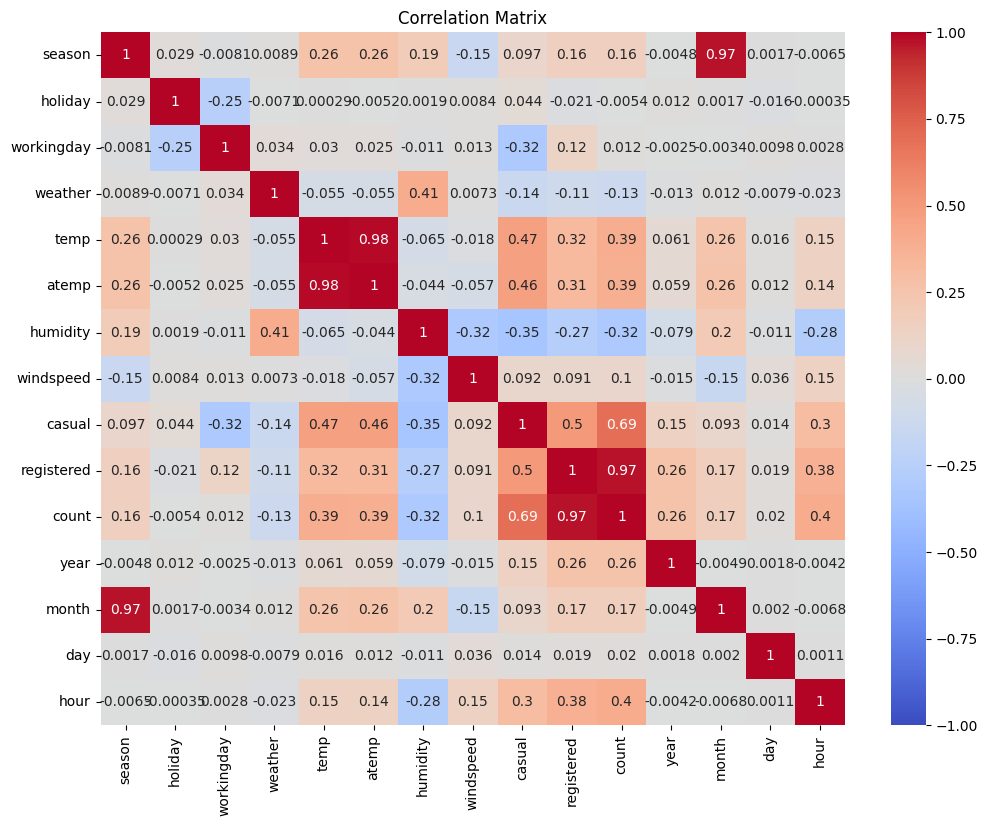

In [28]:
df = pd.DataFrame(train_df)

# 상관 계수 계산
correlation_matrix = df.corr()

# 상관 계수 히트맵 시각화
plt.figure(figsize=(12,9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, center=0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

참고로 지금 palette는 'coolwarm'으로 설정해 준 상태로, 양의 상관 계수를 가지는 변수 쌍은 빨간색, 음의 상관 계수를 가지는 변수 쌍은 파란색으로 표시가 됩니다. 또, 상관 계수의 크기가 클수록 색깔은 진해지는 것을 볼 수 있어요.

예를 들어, 좌측 상단에 굉장히 진한 빨간색으로 표시되어 있는 ```temp```와 ```atemp``` 가 눈에 들어오는데요. 이 둘은 0.98이라는 높은 상관 계수를 가지고 있어요. 일반적으로 실제 온도가 높을수록 체감 온도도 높기 때문에 이는 당연해 보입니다. 그리고 ```humidity```와 ```count```는 -0.32로, 음의 상관관계를 가지고 있네요. 즉, 습도가 높아질수록 자전거 대여량은 감소하는 경향이 있다는 것을 알 수 있습니다.

마지막으로, 우리가 예측해야 하는 값인 count와 연관성이 높은 변수도 찾아볼까요? hour가 0.4로 가장 큰 상관 계수를 보입니다. 즉, 자전거 대여량은 시간과도 관련이 높다는 걸 알 수 있네요.

## 2. 답안지 파일 살펴보기
이제 캐글 사이트에 제출해야 하는 '답안지'에 해당하는 submission_df도 살펴봅시다. 먼저 shape 속성을 통해 데이터의 크기를 알아볼게요.

In [59]:
submission_df.shape

(6493, 2)

테스트 데이터와 동일하게 6,493개의 로우가 있고 컬럼은 2개가 있다는 걸 알 수 있네요. 다음으로는 head() 함수를 이용해 데이터가 대략 어떻게 생겼는지도 살펴 봅시다.

In [60]:
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


출력 결과를 보면, datetime과 count 컬럼이 있는데요. 이전에 훈련 데이터에서 확인했듯이 datetime 값은 한 시간 단위로 되어 있는 것을 알 수 있습니다. 반면 count 값들은 다 0으로 적혀 있어요. 우리는 각각의 datetime마다 자전거 대여량을 예측하여, 그 값을 count 컬럼에 채워 주도록 하겠습니다.

# 모델링
지금까지 훈련 데이터와 테스트 데이터의 EDA를 진행한 후 간단한 전처리 작업을 진행했습니다. 이제 이 훈련 데이터를 가지고 실제로 학습을 진행한 이후에, 테스트 데이터를 통해 모델의 성능을 확인해 볼게요.

## 입력 변수 타겟 변수 분리하기 

지금까지 우리가 다루고 있던 훈련 데이터는 '입력 변수'와 '타겟 변수'를 모두 포함하고 있는 DataFrame이었어요. 여기서 '입력 변수'는 모델이 학습하는 데 사용되는 변수들을 나타내고, '타겟 변수'는 모델이 예측해야 하는 값을 나타내는데요. 입력 변수들을 이용하여 타겟 변수 값을 예측하는 게 우리 모델이 할 일이에요.

실제 모델 학습 과정에서는 기존의 훈련 데이터를 입력 변수와 타겟 변수로 나누는 작업이 필요한데요. 지금부터는 훈련 데이터를 입력 변수X와 타겟 변수y로 분리해 봅시다. 일단 X에서 타겟 변수인 count를 제거해 볼게요.

In [61]:
X = train_df.drop(columns='count')
y = train_df['count']

이어서, 추가로 불필요한 변수들도 몇 개 제거해 보겠습니다. 모델 학습을 시킬 때 주의해야 할 점은 테스트 데이터에서 사용되지 않는 변수들을 훈련 데이터에서도 제거함으로써 두 데이터 사이에 일관성을 유지해야 한다는 거예요. 만약 어떤 컬럼이 훈련 데이터에만 존재하고, 테스트 데이터에는 없는 경우 오류가 발생할 것입니다. 이번 프로젝트에서는 casual, registered가 훈련 데이터에는 있지만, 테스트 데이터에는 없기 때문에 이 변수들을 제거해 줄게요.

그리고 datetime 변수를 가지고 이미 year, month, day, hour라는 변수를 추가했기 때문에, datetime 변수는 삭제해도 괜찮을 것 같네요. 지금까지의 내용을 코드로 작성하면 다음과 같습니다.

In [62]:
X = train_df.drop(columns=['count', 'casual', 'registered', 'datetime'])
y = train_df['count']

테스트 데이터는 X_test에 담아 줄 건데요. 훈련 데이터와 다르게, 테스트 데이터에는 count, casual, registered 변수가 원래 없기 때문에 datetime 변수만 따로 제거해 주면 끝입니다.

In [63]:
X_test = test_df.drop(columns=['datetime'])

모델을 학습시키기 전에, X, y, X_test가 잘 준비된 것이 맞는지 확인해 볼게요. 데이터의 크기와 결측값 개수를 확인해 볼 건데요.

In [64]:
print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')

Train data shape: (10886, 8)
Number of null values: 0

Test data shape: (6493, 8)
Number of null values: 0


출력 결과를 보면, X와 X_test의 컬럼 개수가 12개로 동일하고 결측값도 없다는 것을 알 수 있습니다. 이 DataFrame 그대로 학습을 진행해도 될 것 같네요.

지금까지 작업해 온 코드를 되돌아보면, 처음에는 모든 컬럼을 포함한 DataFrame 앞으로 계속 모델을 개선하면서 지금처럼 훈련 데이터와 테스트 데이터의 컬럼 구성을 수정하는 작업이 계속 반복될 예정입니다. 그래서 이를 위한 코드는 함수로 만들어 둘게요. 함수의 장점은 똑같은 기능을 하는 코드가 여러 번 필요할 때 같은 코드를 또 구현하는 대신 함수만 호출하면 되어서, 코드 구현이 간결해진다는 점이에요.

함수 두 개를 만들어 줄 건데요. 먼저 seperate_train() 함수는 모델 학습에 사용할 입력 변수들과 타겟 변수를 반환하는 역할을, seperate_test() 함수는 예측에 사용할 입력 변수들을 반환하는 역할을 합니다.

In [65]:
def separate_train(df): # 'count' 피쳐를 y로 구분
    X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
    y = df['count']
    return X, y

def separate_test(df): # 'count' 피쳐를 y로 구분
    X_test = df.drop('datetime', axis=1)
    return X_test

이제 방금 만든 함수가 잘 작동하는지 확인해 볼게요.

In [66]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')

Train data shape: (10886, 8)
Number of null values: 0

Test data shape: (6493, 8)
Number of null values: 0


## 훈련 셋과 검증 셋 분할하기

지금부터는 훈련 데이터를 훈련 셋(training set)과 검증 셋(validation set)으로 분리해 볼게요. ```sklearn.model_selection```의 ```train_test_split()```를 사용해서 X와 y 각각에 대해 훈련 셋과 검증 셋으로 나누어 주겠습니다. 훈련 셋은 변수명 뒤에 '_train'을 붙이고, 검증 셋은 '_valid'를 붙여 저장할게요. 훈련 셋과 검증 셋 비율은 8:2로 설정하겠습니다.

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## 훈련 셋으로 모델 학습하기
이제 학습에 사용할 모델을 불러 올게요. 일단 가장 기본적인 모델 중 하나인 선형 회귀 모델을 사용해 보겠습니다. ```sklearn.linear_model```의 ```LinearRegression```을 불러온 뒤, 모델을 만들어서 ```fit()``` 함수를 가지고 학습을 진행하면 되고요. ```fit()``` 함수에는 훈련 셋의 입력 변수 ```X_train```과 타겟 변수 ```y_train```를 파라미터로 넘겨주면 됩니다

In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 검증 셋으로 모델 성능 확인하기
지금부터는 검증 셋에 대한 예측 값을 구하고, 이 값을 실제 답과 비교하면서 모델의 성능을 확인해 봅시다. ```predict()``` 함수에, 미리 준비해 둔 ```X_valid```를 파라미터로 넘겨줄게요.

In [69]:
y_valid_pred = model.predict(X_valid)

그리고 이 프로젝트의 성능 평가 지표 'RMSLE'을 사용하여, 모델의 성능을 확인해 볼게요. 일단 sklearn의 metrics 모듈에 있는 ```mean_squared_log_error```를 이용하면 ```MSLE``` 값을 구할 수 있는데요. 여기에 루트를 씌우면 RMSLE 값이 됩니다. 아래와 같이 ```mean_square_log_error()``` 함수에 예측값 ```y_valid_pred```와 실제 답 ```y_valid```를 파라미터로 넘겨준 뒤, numpy의 ```sqrt()``` 함수를 사용하면 되겠죠?

In [71]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'\nValidation Data RMSLE: {rmsle:.5f}')

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

그런데 위 코드를 실행해 보면 '예측 값에 음의 값이 포함된 경우 MSLE를 계산할 수 없다'는 내용의 에러가 뜹니다. 모델이 구한 예측 값에 음수가 포함되어 있나 보네요. 당연히 자전거 대여량은 음수일 수 없으니, 음수로 예측한 값들은 전부 0으로 바꿔 줍시다. 아래와 같이 numpy의 maximum()함수를 사용하여, 0보다 작은 값은 0으로 대체하는 코드를 추가할게요.

In [72]:
y_valid_pred = np.maximum(0, y_valid_pred)

그리고 다시 코드를 실행해 보면 검증 셋에 대한 RMSLE 값은 1.43054라는 것을 알 수 있네요.

In [73]:
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 1.43054


## Kaggle에 답안 제출하기

드디어 이번 레슨의 마지막 미션입니다! 실제 테스트 데이터 셋을 가지고 답을 예측을 하여 Kaggle에 제출해 볼게요. X_test를 입력 변수로 사용하여 predict() 함수로 예측 값을 구해 보겠습니다. 이번에도 구한 값이 음수이면 0으로 대체하도록 할게요.

In [74]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(0, y_test_pred)

그 다음에는 submission_df의 count컬럼에 y_test_pred에 있는 값들을 채워 넣어 줄게요. 그리고 to_csv() 함수를 이용하여 submission_df을 'submission_baseline.csv'이라는 이름의 파일로 저장해 봅시다.

In [75]:
submission_df['count'] = y_test_pred
submission_df.to_csv('submission_baseline.csv', index=False)
submission_df 

,datetime,count
0,2011-01-20 00:00:00,96.552740
1,2011-01-20 01:00:00,90.439275
2,2011-01-20 02:00:00,90.439275
3,2011-01-20 03:00:00,94.199501
4,2011-01-20 04:00:00,94.199501
...,...,...
6488,2012-12-31 19:00:00,87.309439
6489,2012-12-31 20:00:00,87.309439
6490,2012-12-31 21:00:00,82.029955
6491,2012-12-31 22:00:00,97.043293


마지막으로 이 csv 파일을 Kaggle 사이트에 제출하여 모델의 성능을 확인해 보겠습니다. Kaggle 대회에 답안을 제출하는 방법에 대해서는 튜토리얼 링크를 참고해 주세요. 참고로 이 대회의 리더보드는 현재 업데이트가 중단되어 있어, 지금 제출을 하더라도 공식 순위가 매겨지지는 않아요. 제출 결과는 모델 성능을 확인할 때 참고로 활용해 주시면 됩니다.

Kaggle에 제출하여 나온 결과는 1.34066(RMSLE)이네요. 여기서 Public Score는 대회 데이터의 일부분만을 사용하여 계산되는 점수이고, Private Score는 대회 데이터의 나머지 부분(보통 테스트 데이터셋의 큰 비율)을 사용하여 계산되는 점수인데요. 이미 종료된 대회이기 때문에 지금은 Private Score 값과 Public Score 값이 똑같이 나옵니다.